https://github.com/itmo-ml-lab-ML-course/parser-Sbread

<b>Будем предсказывать скорость разгона до 100 км/ч.
Удалим из датасета незначимые и не численные признаки. Не численные, тоже так как при дискритезации будет сложно описать зависимость, так как на некоторых признаках сложно определить порядок.
Также удалим выбросы.</b>

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import seaborn as sea
import numpy as np

In [46]:
df = pd.read_csv("./resources/data.csv")

In [47]:
df['Разгон до 100 км/ч'] = pd.to_numeric(df['Разгон до 100 км/ч'], errors='coerce')

In [48]:
df = df[pd.notnull(df['Разгон до 100 км/ч'])]
df['Разгон до 100 км/ч']

4         7.8
11        7.8
18        7.8
25        7.8
32        7.8
         ... 
14767     5.4
14771    10.5
14773     5.5
14777     5.3
14779     9.2
Name: Разгон до 100 км/ч, Length: 10233, dtype: float64

In [49]:
drop_column_names = ['Модель', 'Количество мест', 'Расположение руля', 'Размер колёс', 'Объем багажника мин/макс', 'Расход топлива, город/трасса/смешанный',
               'Марка топлива', 'Тип двигателя', 'Тип передней подвески', 'Экологический класс', 'Выбросы CO2', 'Диаметр цилиндра и ход поршня']
for column_name in drop_column_names:
    if column_name in df.columns:
        df.drop(column_name, axis=1, inplace=True)

to_number_col_names = ['Максимальная мощность', 'Максимальный крутящий момент']

for column_name in to_number_col_names:
    df[column_name] = df[column_name].astype(str).str.extract(r'(\d+)')

# non_numeric_columns = df.select_dtypes(exclude=['number']).columns
numeric_columns = df.select_dtypes(include=['number']).columns
df = df[numeric_columns]

# # Discretize (bin) non-numeric columns
# for column in non_numeric_columns:
#     df[column] = pd.Categorical(df[column]).codes

df

,Количество дверей,Длина,Ширина,Высота,Колёсная база,Ширина передней колеи,Ширина задней колеи,Объём топливного бака,Снаряженная масса,Полная масса,Количество передач,Максимальная скорость,Разгон до 100 км/ч,Объем двигателя,Количество цилиндров,Число клапанов на цилиндр,Степень сжатия
4,5,4862,1925,1784,2850,1610.0,1615.0,60.0,1870.0,2447.0,2.0,180.0,7.8,1499.0,4.0,4.0,10.5
11,5,4862,1925,1784,2850,1610.0,1615.0,60.0,1870.0,2447.0,2.0,180.0,7.8,1499.0,4.0,4.0,10.5
18,5,4862,1925,1784,2850,1610.0,1615.0,60.0,1870.0,2447.0,2.0,180.0,7.8,1499.0,4.0,4.0,10.5
25,5,4862,1925,1784,2850,1610.0,1615.0,60.0,1870.0,2447.0,2.0,180.0,7.8,1499.0,4.0,4.0,10.5
32,5,4862,1925,1784,2850,1610.0,1615.0,60.0,1870.0,2447.0,2.0,180.0,7.8,1499.0,4.0,4.0,10.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14767,4,5908,2199,2027,3693,1879.0,1869.0,136.0,2605.0,3245.0,10.0,202.0,5.4,3496.0,6.0,4.0,10.5
14771,5,4565,1821,1620,2780,1563.0,1564.0,61.0,1565.0,2030.0,7.0,195.0,10.5,1499.0,3.0,4.0,11.0
14773,4,5890,2030,1917,3683,1717.0,1717.0,87.0,2654.0,3198.0,10.0,204.0,5.5,3490.0,6.0,4.0,10.0
14777,2,5890,2030,1917,3683,1717.0,1717.0,87.0,2540.0,2994.0,10.0,204.0,5.3,3490.0,6.0,4.0,10.0


In [50]:
def remove_outliers(df):
    df_no_outliers = df.copy()
    for column in df.columns:
        Q1 = df[column].quantile(0.15)
        Q3 = df[column].quantile(0.85)
        IQR = Q3 - Q1
        threshold = 1.5
        df_no_outliers = df_no_outliers[(df_no_outliers[column] >= Q1 - threshold * IQR) & (df_no_outliers[column] <= Q3 + threshold * IQR)]
    return df_no_outliers

df = remove_outliers(df)
df

,Количество дверей,Длина,Ширина,Высота,Колёсная база,Ширина передней колеи,Ширина задней колеи,Объём топливного бака,Снаряженная масса,Полная масса,Количество передач,Максимальная скорость,Разгон до 100 км/ч,Объем двигателя,Количество цилиндров,Число клапанов на цилиндр,Степень сжатия
4,5,4862,1925,1784,2850,1610.0,1615.0,60.0,1870.0,2447.0,2.0,180.0,7.8,1499.0,4.0,4.0,10.5
11,5,4862,1925,1784,2850,1610.0,1615.0,60.0,1870.0,2447.0,2.0,180.0,7.8,1499.0,4.0,4.0,10.5
18,5,4862,1925,1784,2850,1610.0,1615.0,60.0,1870.0,2447.0,2.0,180.0,7.8,1499.0,4.0,4.0,10.5
25,5,4862,1925,1784,2850,1610.0,1615.0,60.0,1870.0,2447.0,2.0,180.0,7.8,1499.0,4.0,4.0,10.5
32,5,4862,1925,1784,2850,1610.0,1615.0,60.0,1870.0,2447.0,2.0,180.0,7.8,1499.0,4.0,4.0,10.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14752,3,4241,1777,1424,2602,1543.0,1514.0,50.0,1150.0,1710.0,6.0,206.0,9.7,999.0,3.0,4.0,10.5
14759,4,4362,1698,1430,2615,1484.0,1477.0,55.0,1090.0,1595.0,5.0,171.0,14.4,1388.0,4.0,4.0,11.0
14762,5,4152,1702,1460,2615,1484.0,1477.0,55.0,1060.0,1570.0,5.0,171.0,14.3,1388.0,4.0,4.0,11.0
14771,5,4565,1821,1620,2780,1563.0,1564.0,61.0,1565.0,2030.0,7.0,195.0,10.5,1499.0,3.0,4.0,11.0


<b>Посмотрим что у нас осталось.
Построим гистограмму целевого признака, а также таблицу корреляции. </b>

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3820 entries, 4 to 14779
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Количество дверей          3820 non-null   int64  
 1   Длина                      3820 non-null   int64  
 2   Ширина                     3820 non-null   int64  
 3   Высота                     3820 non-null   int64  
 4   Колёсная база              3820 non-null   int64  
 5   Ширина передней колеи      3820 non-null   float64
 6   Ширина задней колеи        3820 non-null   float64
 7   Объём топливного бака      3820 non-null   float64
 8   Снаряженная масса          3820 non-null   float64
 9   Полная масса               3820 non-null   float64
 10  Количество передач         3820 non-null   float64
 11  Максимальная скорость      3820 non-null   float64
 12  Разгон до 100 км/ч         3820 non-null   float64
 13  Объем двигателя            3820 non-null   float64
 

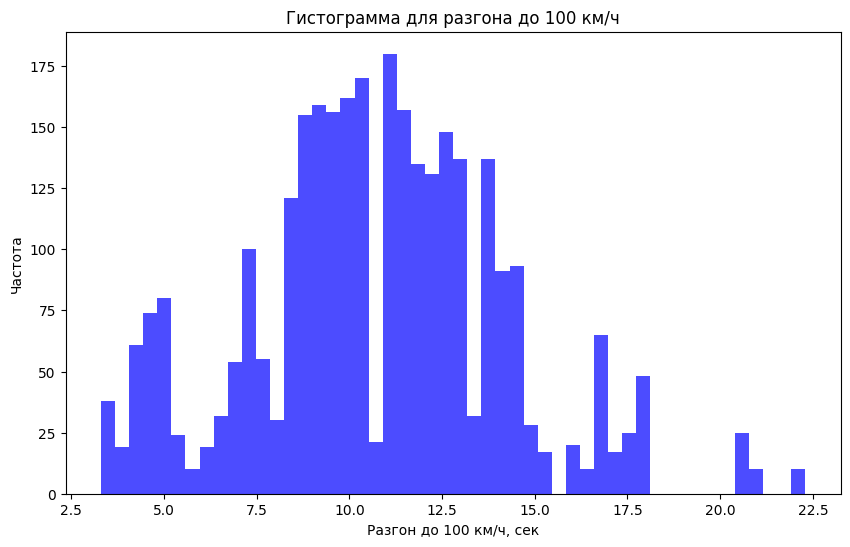

In [52]:
X = df.drop('Разгон до 100 км/ч', axis=1)
y = df['Разгон до 100 км/ч']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
plt.figure(figsize=(10, 6))
plt.hist(y_train, bins=50, color='blue', alpha=0.7)
plt.title('Гистограмма для разгона до 100 км/ч')
plt.xlabel('Разгон до 100 км/ч, сек')
plt.ylabel('Частота')
plt.show()

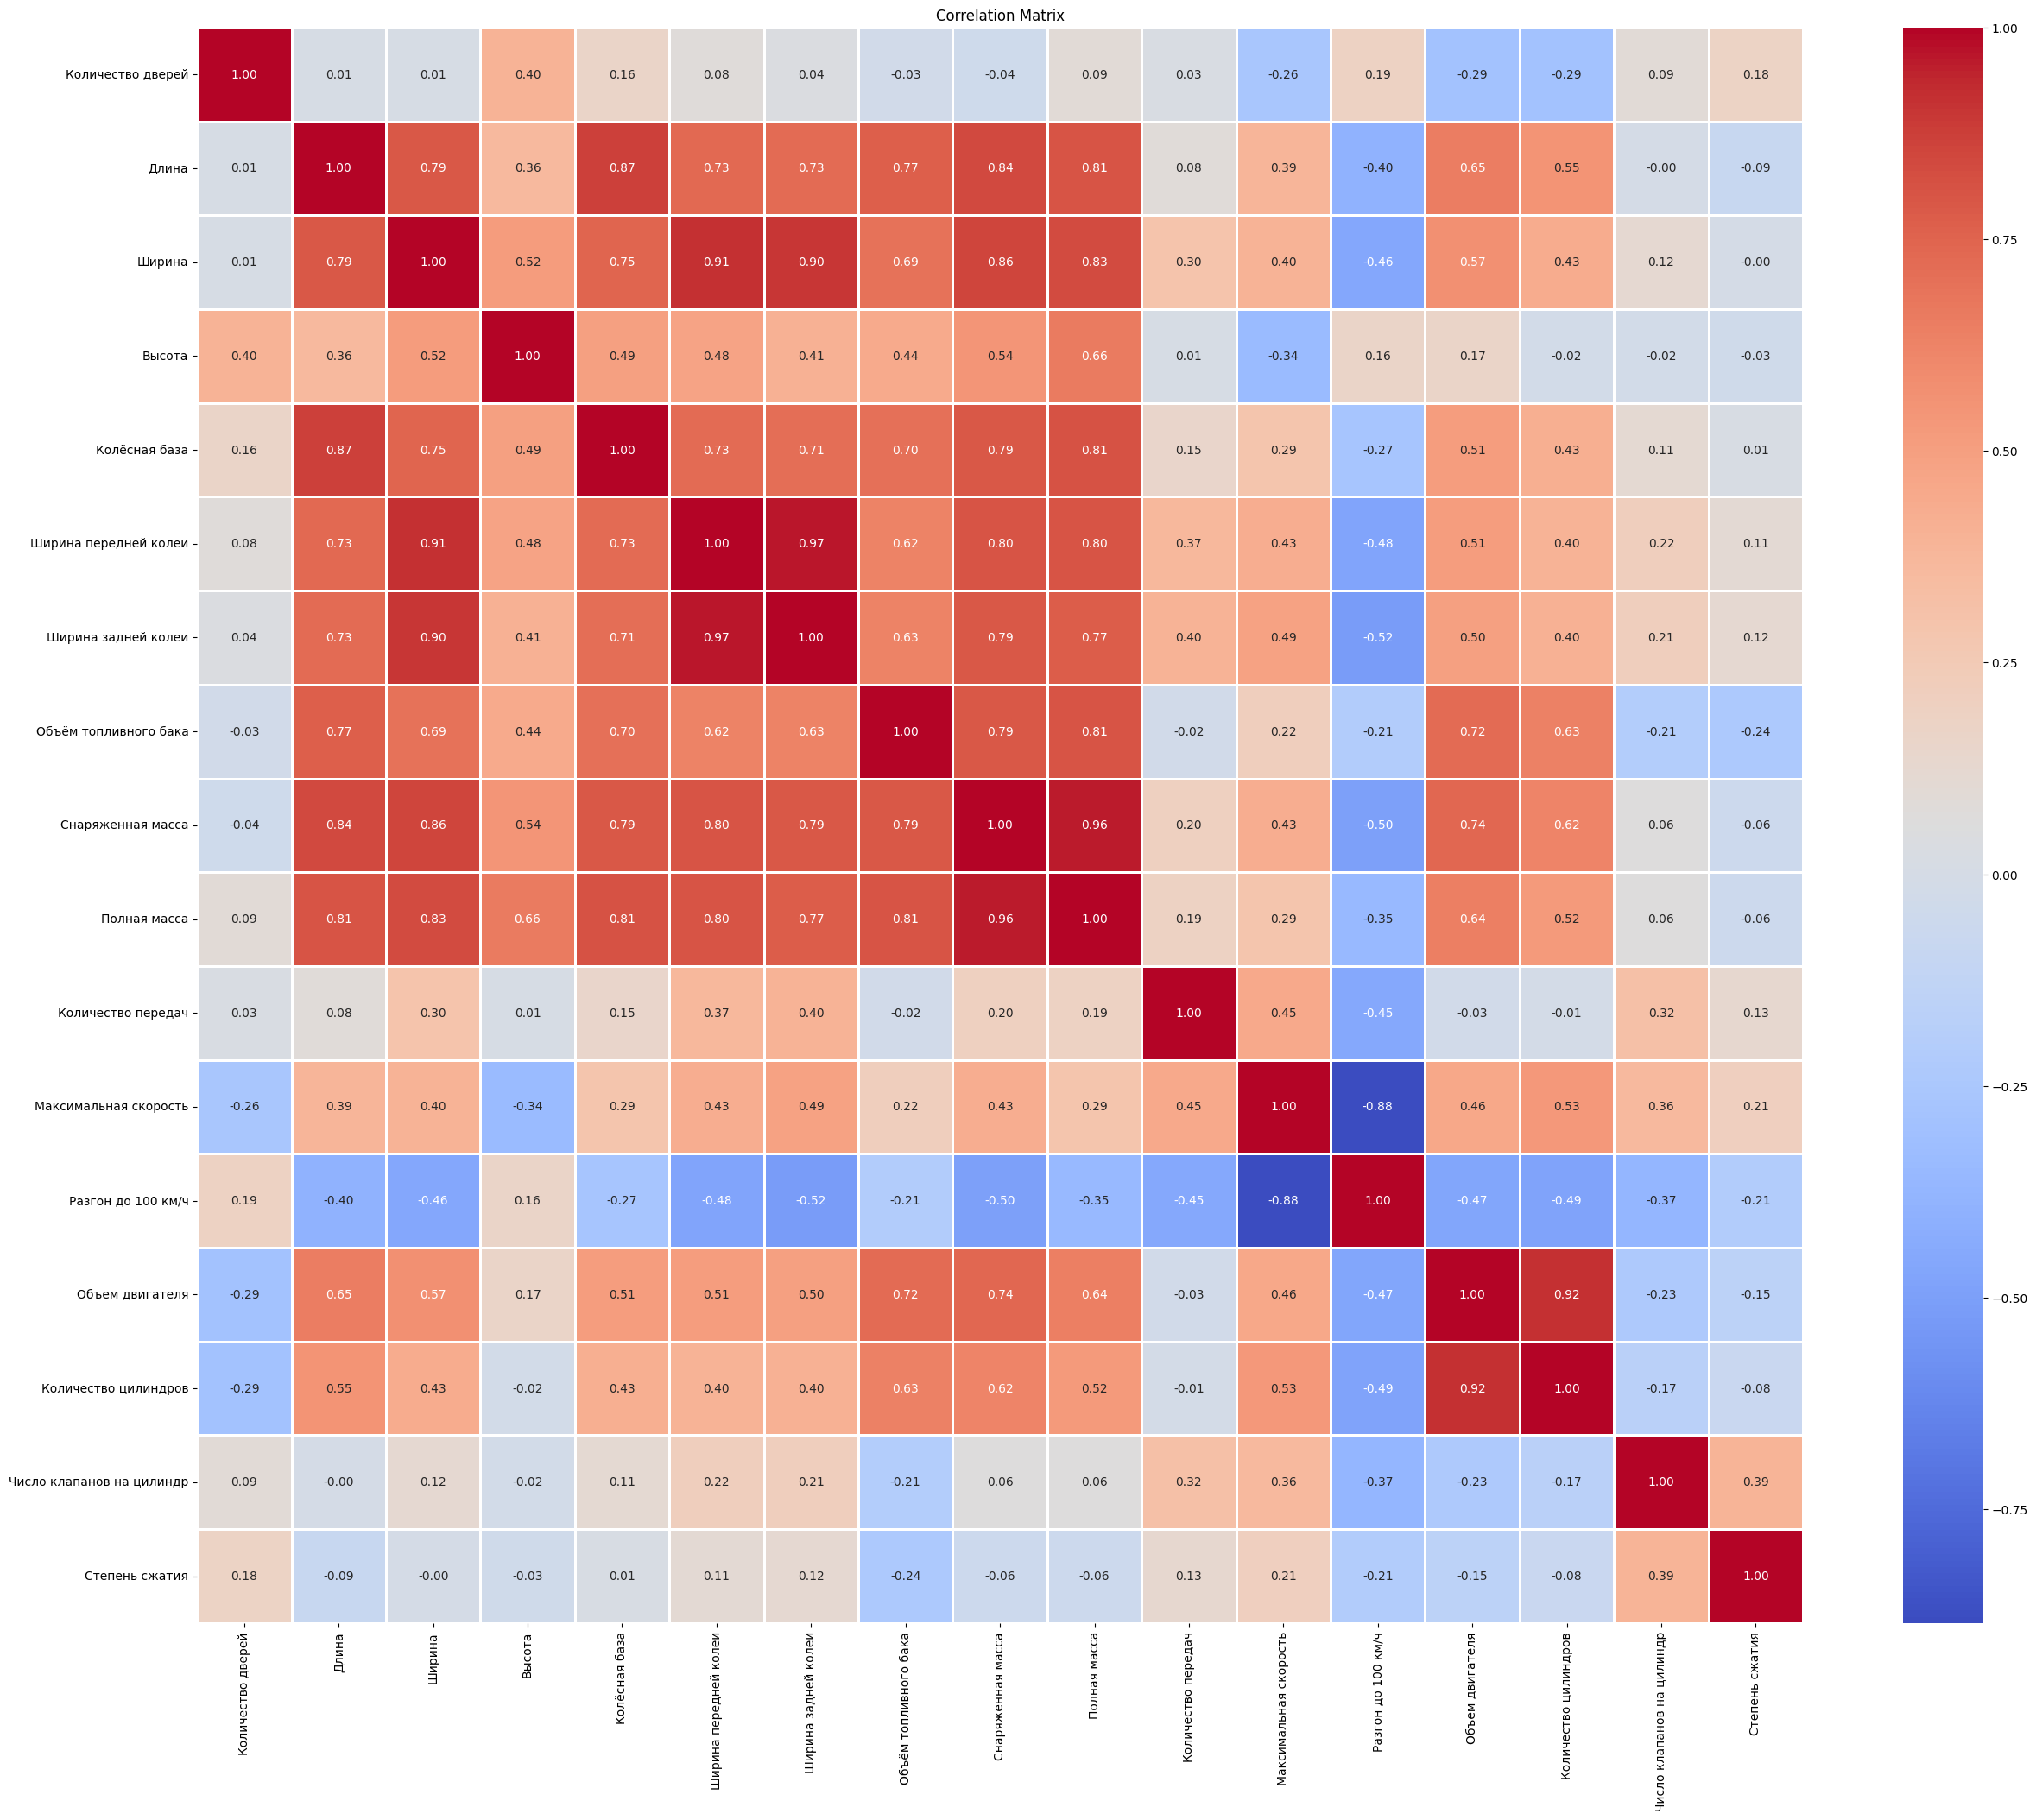

In [53]:
corr_matrix = df.corr()

plt.figure(figsize=(30, 24))
sea.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1)
plt.title('Correlation Matrix')
plt.show()

Отметим наблюдение, что более быстрому разгону соотвествует большая максимальная скорость и большая мощность двигателя, а также более маленькие автомобили. Что вполне логично. <br>
<b>Наблюдается близкая к линейной зависимость, поэтому построим линейную регрессию.</b>

In [54]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print("Coefficients:", model.coef_)

Mean Squared Error: 1.795410988748459
Coefficients: [-0.28274434 -0.48046465 -0.20283552 -0.20932783  1.00405352  0.30289358
 -0.21433902  0.5111015  -1.76484716  0.98516035 -0.2376417  -2.4385381
 -0.84933908  0.39218608 -0.37028247 -0.1043924 ]


In [56]:
class MyLinearRegression:
    def __init__(self):
        self.coefficients = None
        self.intercept = None
        self.slope = None

    def fit(self, X, y):
        X_aug = np.c_[np.ones(X.shape[0]), X]
        coefficients = np.linalg.inv(X_aug.T @ X_aug) @ X_aug.T @ y
        self.coefficients = coefficients
        self.intercept = coefficients[0]
        self.slope = coefficients[1:]

    def predict(self, X):
        X_aug = np.c_[np.ones(X.shape[0]), X]
        return X_aug @ np.concatenate([[self.intercept], self.slope])

In [60]:
X_train_np = X_train.to_numpy()
y_train_np = y_train.to_numpy()
X_test_np = X_test.to_numpy()
custom_model = MyLinearRegression()
custom_model.fit(X_train_np, y_train_np)
y_pred_custom = custom_model.predict(X_test_np)
mse = mean_squared_error(y_test, y_pred_custom)
print(f"Mean Squared Error: {mse}")

# Выводим коэффициенты модели
print("Intercept:", custom_model.intercept)
print("Coefficient:", custom_model.slope)

Mean Squared Error: 1.795410988748293
Intercept: 27.340469208627717
Coefficient: [-0.23712497 -0.0011785  -0.00204501 -0.00121372  0.00480433  0.00395797
 -0.00262162  0.03336384 -0.00502108  0.00240435 -0.21257878 -0.0771939
 -0.00072376  0.27767281 -0.41472592 -0.12858329]


In [62]:
mae_lib = mean_absolute_error(y_test, y_pred)
mse_lib = mean_squared_error(y_test, y_pred)
mae_custom = mean_absolute_error(y_test, y_pred_custom)
mse_custom = mean_squared_error(y_test, y_pred_custom)
print(f'MAE| lib: {mae_lib:.2f}, custom: {mae_custom:.2f}')
print(f'MSE| lib: {mse_lib:.2f}, custom: {mse_custom:.2f}')

MAE| lib: 0.99, custom: 0.99
MSE| lib: 1.80, custom: 1.80


<b>Благодаря совпадению ошибок, делаем вывод, что своя реализация написана верно</b>

<b>Для отображения реальность нашей модель сравним ожидаемые и предсказанные результаты</b>

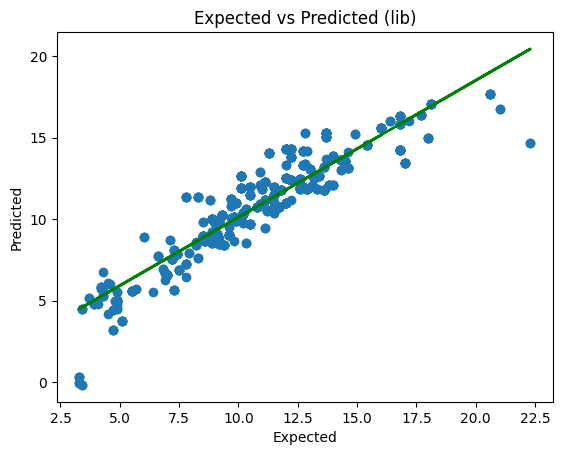

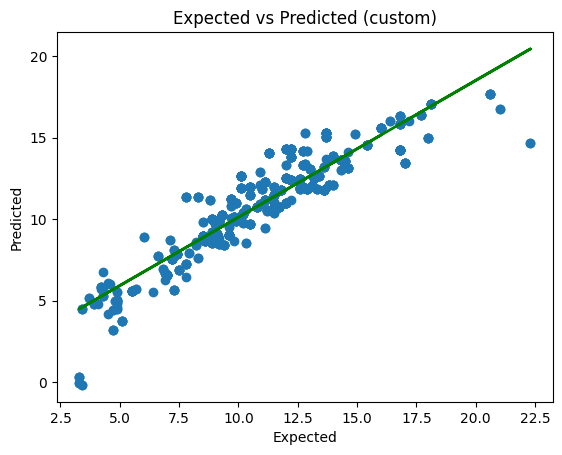

In [67]:
plt.scatter(y_test, y_pred)
plt.xlabel("Expected")
plt.ylabel("Predicted")
plt.title("Expected vs Predicted (lib)")
coeffs = np.polyfit(y_test, y_pred, 1)
line_fit = np.polyval(coeffs, y_test)
plt.plot(y_test, line_fit, color='green', linewidth=2, label='Regression Line')
plt.show()

plt.scatter(y_test, y_pred_custom)
plt.xlabel("Expected")
plt.ylabel("Predicted")
plt.title("Expected vs Predicted (custom)")
coeffs = np.polyfit(y_test, y_pred_custom, 1)
line_fit = np.polyval(coeffs, y_test)
plt.plot(y_test, line_fit, color='green', linewidth=2, label='Regression Line')
plt.show()

<b>Делаем вывод, что линейная модель вполне отображает зависимость</b>